In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'D:\College\Third Year Sem-1\DATAVISUALIZATION\Project\Telco-Customer-Churn.csv')

In [3]:
data.head().T

0             1               2  \
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                           1            34               2   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Contract            Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed check    Mailed check   
MonthlyCharges               29.85         56.95           53.85   
TotalCharges                 29.85        1889.5          108.15   
Churn                           No            No             Yes   

                                          3                 4  
customerID                       7795-CFOCW        9237-HQITU  
gender                                 Male            Female  
SeniorCitizen                             0                 0  
Partner                                  No                No  
Dependents                               No                No  
tenure                                   45                 2  
PhoneService                             No               Yes  
MultipleLines              No phone service                No  
InternetService                         DSL       Fiber optic  
OnlineSecurity                          Yes                No  
OnlineBackup                             No                No  
DeviceProtection                        Yes                No  
TechSupport                             Yes                No  
StreamingTV                              No                No  
StreamingMovies                          No                No  
Contract                           One year    Month-to-month  
PaperlessBilling                         No               Yes  
PaymentMethod     Bank transfer (automatic)  Electronic check  
MonthlyCharges                         42.3              70.7  
TotalCharges                        1840.75            151.65  
Churn                                    No               Yes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
data['SeniorCitizen']=pd.Categorical(data['SeniorCitizen'])
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors="coerce")
data.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [6]:
del data["customerID"]
data.dtypes

gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [7]:
data.isnull().sum() 

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
data = data.dropna()
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
numerics = ['float64', 'int64']
numeric_ds = data.select_dtypes(include=numerics)
objects_ds = data.select_dtypes(exclude=numerics)

In [10]:
numeric_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 3 columns):
tenure            7032 non-null int64
MonthlyCharges    7032 non-null float64
TotalCharges      7032 non-null float64
dtypes: float64(2), int64(1)
memory usage: 219.8 KB


In [11]:
numeric_ds.describe().T

count         mean          std    min       25%       50%  \
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

In [12]:
objects_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null category
Partner             7032 non-null object
Dependents          7032 non-null object
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
Churn               7032 non-null object
dtypes: category(1), object(16)
memory usage: 940.9+ KB


In [13]:
objects_ds.describe().T

count unique               top  freq
gender            7032      2              Male  3549
SeniorCitizen     7032      2                 0  5890
Partner           7032      2                No  3639
Dependents        7032      2                No  4933
PhoneService      7032      2               Yes  6352
MultipleLines     7032      3                No  3385
InternetService   7032      3       Fiber optic  3096
OnlineSecurity    7032      3                No  3497
OnlineBackup      7032      3                No  3087
DeviceProtection  7032      3                No  3094
TechSupport       7032      3                No  3472
StreamingTV       7032      3                No  2809
StreamingMovies   7032      3                No  2781
Contract          7032      3    Month-to-month  3875
PaperlessBilling  7032      2               Yes  4168
PaymentMethod     7032      4  Electronic check  2365
Churn             7032      2                No  5163

In [14]:
data.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

In [15]:
#Analysing The Numerical DATA

[]

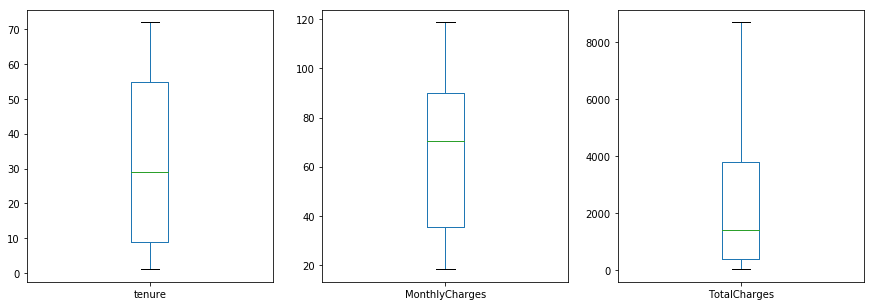

In [16]:
# box plots
numeric_ds.plot(kind='box', subplots=True, figsize=(15,5))
plt.plot()


[]

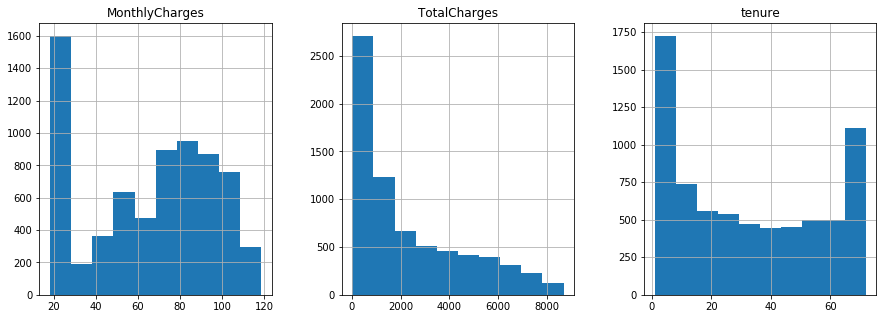

In [17]:
# histogram plots
numeric_ds.hist(layout=(1,3), figsize=(15,5))
plt.plot()

In [18]:
#Now Lets Compare the each numeric values with churn(our prediction Variable)
#lets add the churn variable to dataset
numeric_ds = pd.concat([numeric_ds,data["Churn"]],axis=1)

In [19]:
numeric_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 4 columns):
tenure            7032 non-null int64
MonthlyCharges    7032 non-null float64
TotalCharges      7032 non-null float64
Churn             7032 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 274.7+ KB


In [20]:
numeric_ds.describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

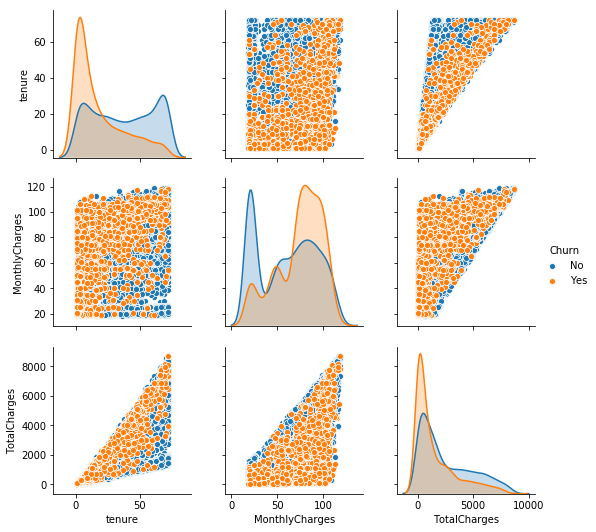

In [21]:
sns.pairplot(numeric_ds,hue='Churn')

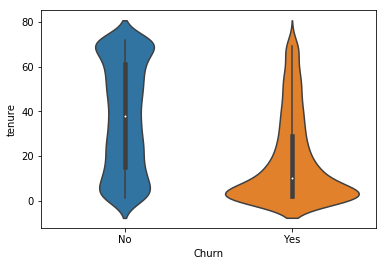

In [22]:
sns.violinplot(x="Churn", y="tenure", data=numeric_ds);

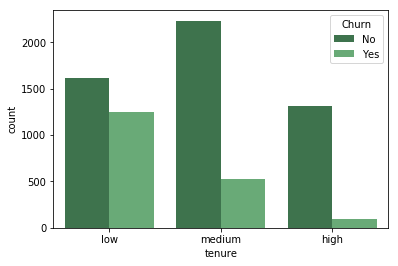

In [23]:
tenure_bins=pd.cut(numeric_ds["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

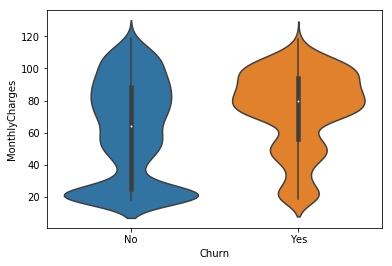

In [24]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=numeric_ds);

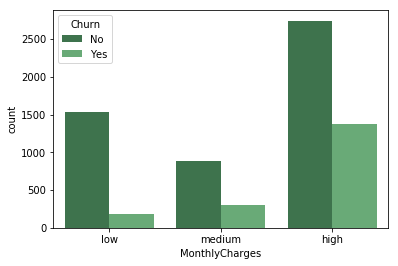

In [25]:
MonthlyCharges_bins=pd.cut(numeric_ds["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

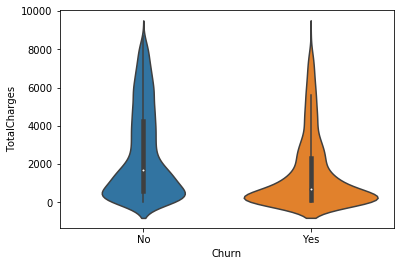

In [26]:
sns.violinplot(x="Churn", y="TotalCharges", data=numeric_ds);

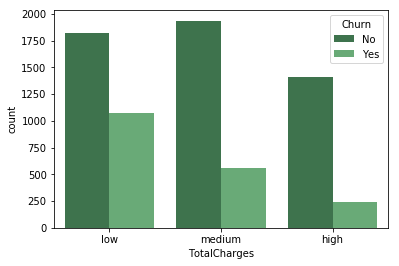

In [27]:
TotalCharges_bins=pd.cut(numeric_ds["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

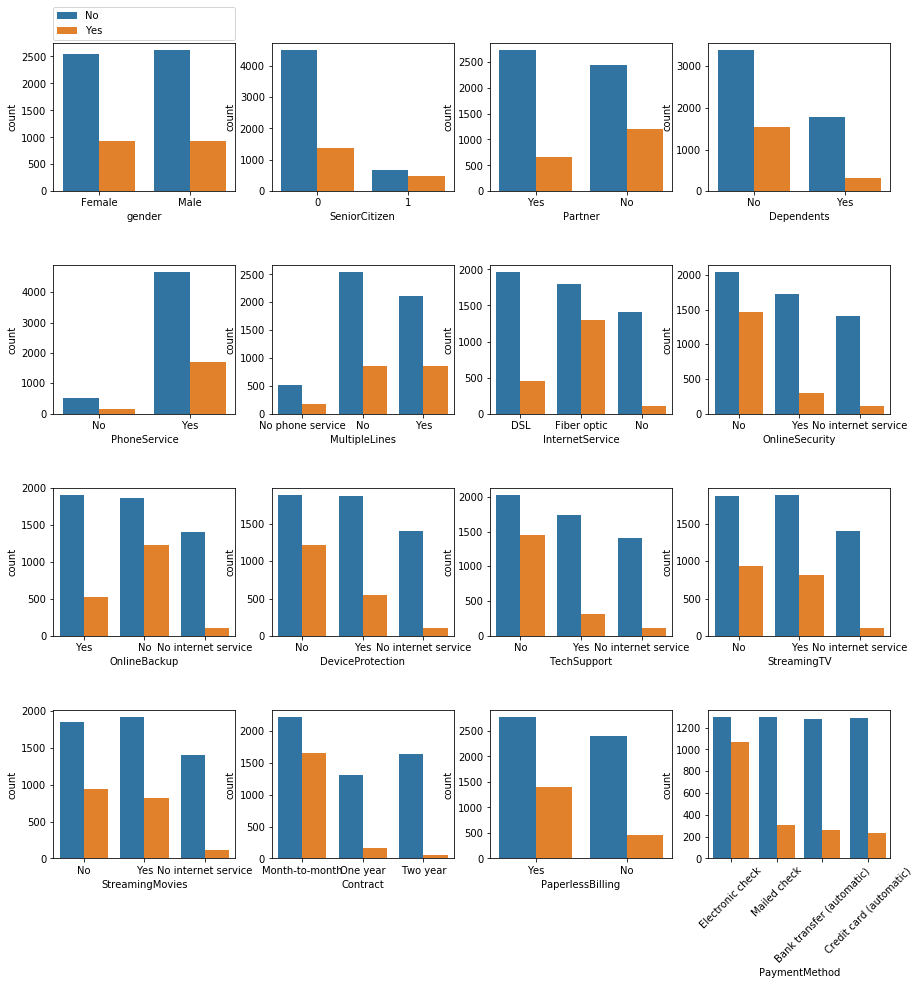

In [28]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

In [29]:
bins=pd.DataFrame([tenure_bins, MonthlyCharges_bins, TotalCharges_bins]).T

In [30]:
bins

tenure MonthlyCharges TotalCharges
0        low            low          low
1     medium         medium       medium
2        low         medium          low
3     medium         medium       medium
4        low           high          low
5        low           high          low
6     medium           high       medium
7        low            low          low
8     medium           high       medium
9       high         medium       medium
10       low         medium          low
11       low            low          low
12    medium           high         high
13    medium           high         high
14    medium           high       medium
15      high           high         high
16    medium            low       medium
17      high           high         high
18       low         medium          low
19    medium           high       medium
20       low         medium          low
21       low            low          low
22       low            low          low
23    medium         medium       medium
24    medium         medium       medium
25    medium         medium       medium
26    medium           high         high
27       low            low          low
28      high           high         high
29       low           high       medium
...      ...            ...          ...
7013  medium           high       medium
7014  medium           high       medium
7015  medium           high       medium
7016     low         medium          low
7017  medium            low       medium
7018     low           high          low
7019  medium            low          low
7020     low            low          low
7021     low         medium          low
7022    high           high         high
7023    high           high         high
7024  medium           high       medium
7025     low           high       medium
7026     low         medium          low
7027     low           high          low
7028    high           high         high
7029     low         medium          low
7030     low            low          low
7031  medium         medium       medium
7032     low           high          low
7033  medium           high       medium
7034    high           high         high
7035     low           high       medium
7036     low           high          low
7037    high            low       medium
7038  medium           high       medium
7039    high           high         high
7040     low            low          low
7041     low           high          low
7042    high           high         high

[7032 rows x 3 columns]

D:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


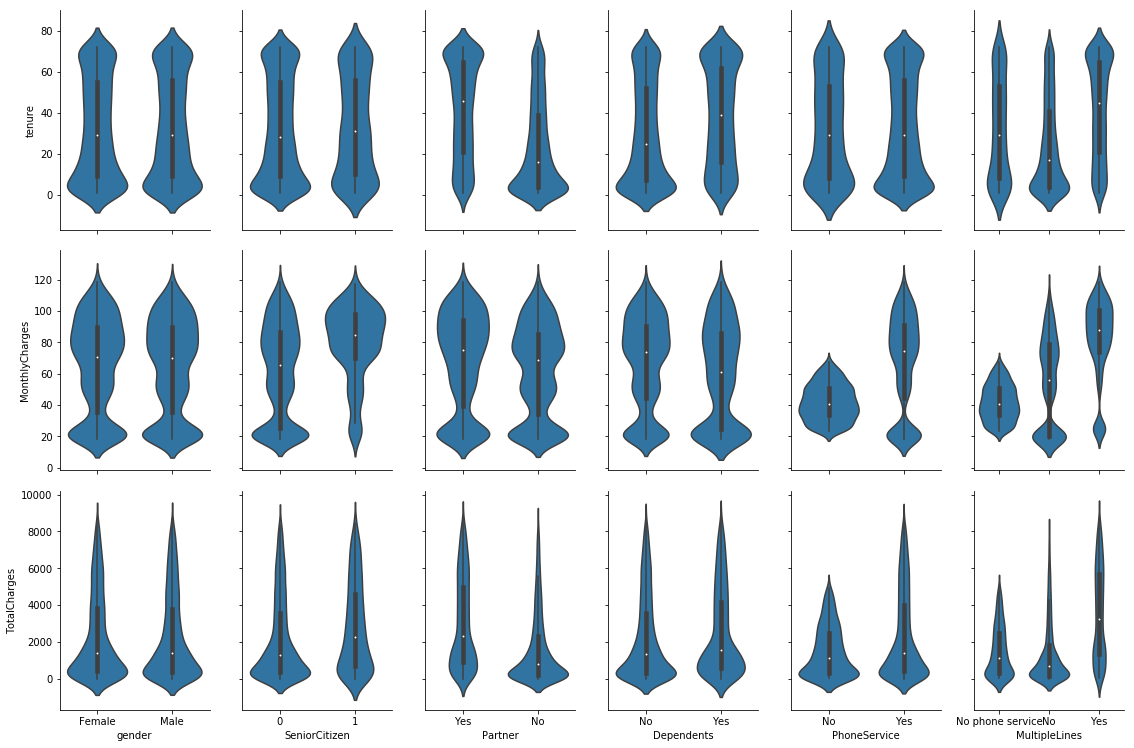

In [31]:
g = sns.PairGrid(data, x_vars=objects_ds.columns[0:6].values,
    y_vars=numeric_ds.columns[0:3].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

In [32]:
catdata=pd.concat([bins,objects_ds],axis=1)
catdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
tenure              7032 non-null object
MonthlyCharges      7032 non-null object
TotalCharges        7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null category
Partner             7032 non-null object
Dependents          7032 non-null object
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
Churn               7032 non-null object
dtypes: category(1), object(19)
memory usage: 1.4+ MB


In [33]:
for i in list(catdata.columns):
    catdata[i] = pd.Categorical(catdata[i]) # Convert all the variables into categorical
 # Transform the categorical variables into binary vector
dummy = pd.get_dummies(catdata)

In [34]:
dummy.head()

tenure_high  tenure_low  tenure_medium  MonthlyCharges_high  \
0            0           1              0                    0   
1            0           0              1                    0   
2            0           1              0                    0   
3            0           0              1                    0   
4            0           1              0                    1   

   MonthlyCharges_low  MonthlyCharges_medium  TotalCharges_high  \
0                   1                      0                  0   
1                   0                      1                  0   
2                   0                      1                  0   
3                   0                      1                  0   
4                   0                      0                  0   

   TotalCharges_low  TotalCharges_medium  gender_Female  ...  \
0                 1                    0              1  ...   
1                 0                    1              0  ...   
2                 1                    0              0  ...   
3                 0                    1              0  ...   
4                 1                    0              1  ...   

   Contract_One year  Contract_Two year  PaperlessBilling_No  \
0                  0                  0                    0   
1                  1                  0                    1   
2                  0                  0                    0   
3                  1                  0                    1   
4                  0                  0                    0   

   PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                     1                                        0   
1                     0                                        0   
2                     1                                        0   
3                     0                                        1   
4                     1                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Churn_No  Churn_Yes  
0                           0         1          0  
1                           1         1          0  
2                           1         0          1  
3                           0         1          0  
4                           0         0          1  

[5 rows x 54 columns]

In [35]:
catdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
tenure              7032 non-null category
MonthlyCharges      7032 non-null category
TotalCharges        7032 non-null category
gender              7032 non-null category
SeniorCitizen       7032 non-null category
Partner             7032 non-null category
Dependents          7032 non-null category
PhoneService        7032 non-null category
MultipleLines       7032 non-null category
InternetService     7032 non-null category
OnlineSecurity      7032 non-null category
OnlineBackup        7032 non-null category
DeviceProtection    7032 non-null category
TechSupport         7032 non-null category
StreamingTV         7032 non-null category
StreamingMovies     7032 non-null category
Contract            7032 non-null category
PaperlessBilling    7032 non-null category
PaymentMethod       7032 non-null category
Churn               7032 non-null category
dtypes: category(20)
memory usage

In [36]:
accuracy_scores=[]

In [37]:
from sklearn import model_selection

In [38]:
features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns
X = dummy[features].values
Y = dummy["Churn_Yes"].values
validation_size = 0.20
seed = 7
xtrain,xtest, ytrain,ytest = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
LRalgo=LogisticRegression()

In [41]:
LRalgo.fit(xtrain,ytrain)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
ypred=LRalgo.predict(xtest)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(ytest,ypred)

array([[918,  99],
       [190, 200]], dtype=int64)

In [44]:
accuracy_scores.append(accuracy_score(ytest,ypred))
accuracy_score(ytest,ypred)

0.7945984363894811

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
tree = DecisionTreeClassifier() 

model = tree.fit(xtrain,ytrain)

In [47]:
ypred=model.predict(xtest)

In [48]:
confusion_matrix(ytest,ypred)

array([[843, 174],
       [204, 186]], dtype=int64)

In [49]:
accuracy_scores.append(accuracy_score(ytest,ypred))
accuracy_score(ytest,ypred)

0.7313432835820896

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
maxac=0
maxacpos=0
for i in range(1,100):
    algo=RandomForestClassifier(n_estimators=i)
    algo.fit(xtrain,ytrain)
    ypred=algo.predict(xtest)
    accuracy=accuracy_score(ytest,ypred)
    if accuracy > maxac:
        maxac=accuracy
        maxacpos=i

print(maxac)
print(maxacpos)

0.7903340440653873
71


In [52]:
accuracy_scores.append(maxac)

In [53]:
from sklearn.neural_network import MLPClassifier
algo=MLPClassifier(hidden_layer_sizes=(30,30,30),verbose=True,random_state=5)

In [54]:
algo.fit(xtrain,ytrain)

Iteration 1, loss = 0.58222169
Iteration 2, loss = 0.47410912
Iteration 3, loss = 0.44103261
Iteration 4, loss = 0.42973943
Iteration 5, loss = 0.42518348
Iteration 6, loss = 0.42408517
Iteration 7, loss = 0.42204200
Iteration 8, loss = 0.41839698
Iteration 9, loss = 0.41763569
Iteration 10, loss = 0.41563063
Iteration 11, loss = 0.41540811
Iteration 12, loss = 0.41435826
Iteration 13, loss = 0.41334168
Iteration 14, loss = 0.41197326
Iteration 15, loss = 0.41363640
Iteration 16, loss = 0.41144941
Iteration 17, loss = 0.40996381
Iteration 18, loss = 0.40919519
Iteration 19, loss = 0.40914570
Iteration 20, loss = 0.40814266
Iteration 21, loss = 0.40722457
Iteration 22, loss = 0.40739190
Iteration 23, loss = 0.40566857
Iteration 24, loss = 0.40614363
Iteration 25, loss = 0.40454708
Iteration 26, loss = 0.40491124
Iteration 27, loss = 0.40271333
Iteration 28, loss = 0.40119660
Iteration 29, loss = 0.40163180
Iteration 30, loss = 0.40368297
Iteration 31, loss = 0.39877165
Iteration 32, los

D:\Program Files\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=5, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [55]:
ypred=algo.predict(xtest)

In [56]:
confusion_matrix(ytest,ypred)

array([[872, 145],
       [207, 183]], dtype=int64)

In [57]:
accuracy_scores.append(accuracy_score(ytest,ypred))
accuracy_score(ytest,ypred)

0.749822316986496

In [58]:
from sklearn import svm

In [59]:
clf = svm.SVC(gamma='scale')

In [60]:
clf.fit(xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
ypred=clf.predict(xtest)

In [62]:
confusion_matrix(ytest,ypred)

array([[937,  80],
       [209, 181]], dtype=int64)

In [63]:
accuracy_scores.append(accuracy_score(ytest,ypred))
accuracy_score(ytest,ypred)

0.7945984363894811

In [74]:
algorithms=["LogisticRegression","Decision_Tree","Random_Forest","Artificial_Neural_Networks","Support Vector Machine"]

In [75]:
accuracy_scores

[0.7945984363894811,
 0.7313432835820896,
 0.7903340440653873,
 0.749822316986496,
 0.7945984363894811]

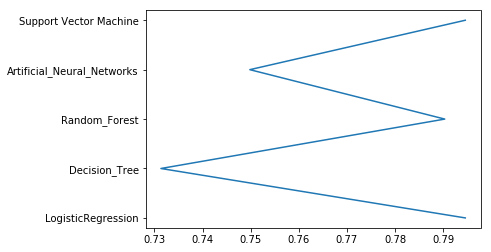

In [81]:
plt.plot(accuracy_scores,algorithms)